## 14.1 USDA Food Database

In [36]:
# elimizde Amerika Tarım Bakanlığına ait besin bilgilerinden oluşan bir dataset
# var ve JSON formatında.
import json #json çalışıcaz.
db = json.load(open(r"C:\Users\Asus\Documents\Datasets\usda_food.json"))

len(db)

6636

In [37]:
# datasetteki her bir entry tek bir yemek için tüm dataları tutuyor. Nutrien alanı
# ayrıca bir sözlük.

db[0]['id']

1008

In [12]:
db[0]['nutrients'][0] # liste içerisindeki nutrients sözlüğün ilk indexi.

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [46]:
import pandas as pd
nutrients = pd.DataFrame(db[0]['nutrients'])

In [47]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [18]:
# bir sözlük dizinini eğer dataframe'e çeviriyorsak, ayrıştırılıcak alanları
# belirleyebiliriz.
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db,columns = info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [19]:
info.info() #nedir ne değildir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [20]:
pd.value_counts(info.group)[:10] ## group kolonuna ait unqiue value countları.

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [51]:
# Analiz yapabilmemiz için en kolayı her bir besin için nutriensleri bir tabloda
# toplamak olucaktır.
# Bunun için önce her bir food nutriendsi DataFrame'e çeviricez ve food için bir id eklicez.
# bunu dataframe'e eklicez.
# concat yardımı ile concatlıcaz.


add_here = []
for l in range(len(db)):
    df = pd.DataFrame(db[l]['nutrients'])
    df['id'] = db[l]['id']
    add_here.append(df)

add_here = pd.concat(add_here, ignore_index = True)

nutrients = add_here.copy()


In [52]:
# duplicate olanları drop edelim.
nutrients.duplicated().sum()

nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [53]:
# group ve description iki dataframein objesi de olduğu için rename edelim.
col_mapping = { 'description': 'food',
                  'group' : 'fgroup'}

info = info.rename(columns = col_mapping, copy = False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [54]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}

nutrients = nutrients.rename(columns= col_mapping, copy= False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [56]:
# şimdi merge edelibiliriz.
ndata = pd.merge(nutrients, info, on ='id', how ='outer')

ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [57]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

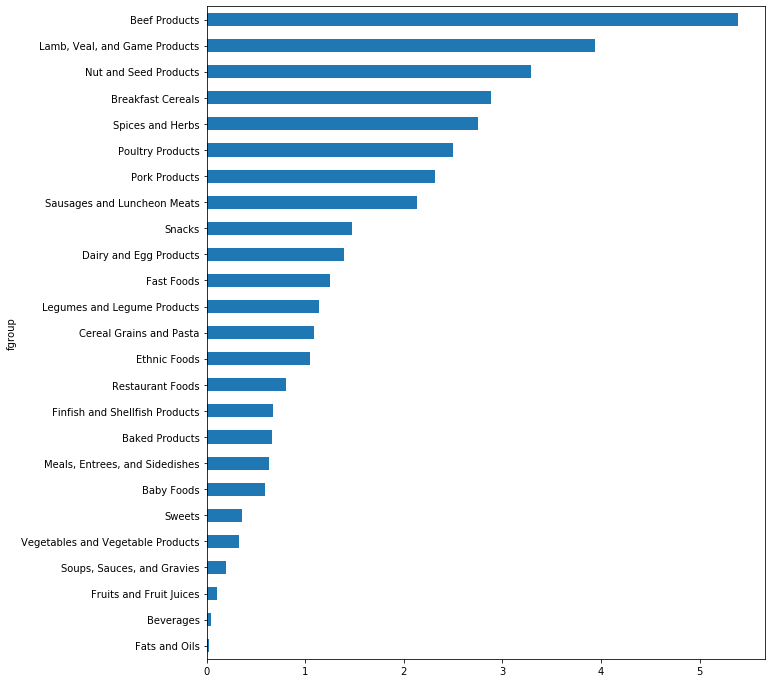

In [61]:
# datayı nihai haliyle visiualize edelim.
import matplotlib as plt
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind = 'barh', figsize = (10,12))
## zinc değelerinin median değerleri

In [63]:
# eğer ki hangi yemek en yoğun diye araştırıyorsak.

by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value','food']]

max_foods.food = max_foods.food.str[:50]

max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 